In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, auc, roc_curve
pd.set_option('display.max_columns',80)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('application_data.csv', header=0)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...

In [3]:
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [6]:
for i in df.columns:
    print(i,df[i].unique(),'\n')

SK_ID_CURR [100002 100003 100004 ... 456253 456254 456255] 

TARGET [1 0] 

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans'] 

CODE_GENDER ['M' 'F' 'XNA'] 

FLAG_OWN_CAR ['N' 'Y'] 

FLAG_OWN_REALTY ['Y' 'N'] 

CNT_CHILDREN [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14] 

AMT_INCOME_TOTAL [202500.  270000.   67500.  ...  96768.  546250.5 113062.5] 

AMT_CREDIT [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ] 

AMT_ANNUITY [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5] 

AMT_GOODS_PRICE [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5] 

NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

NAME_FAMILY_STATUS ['Single 

In [7]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

49


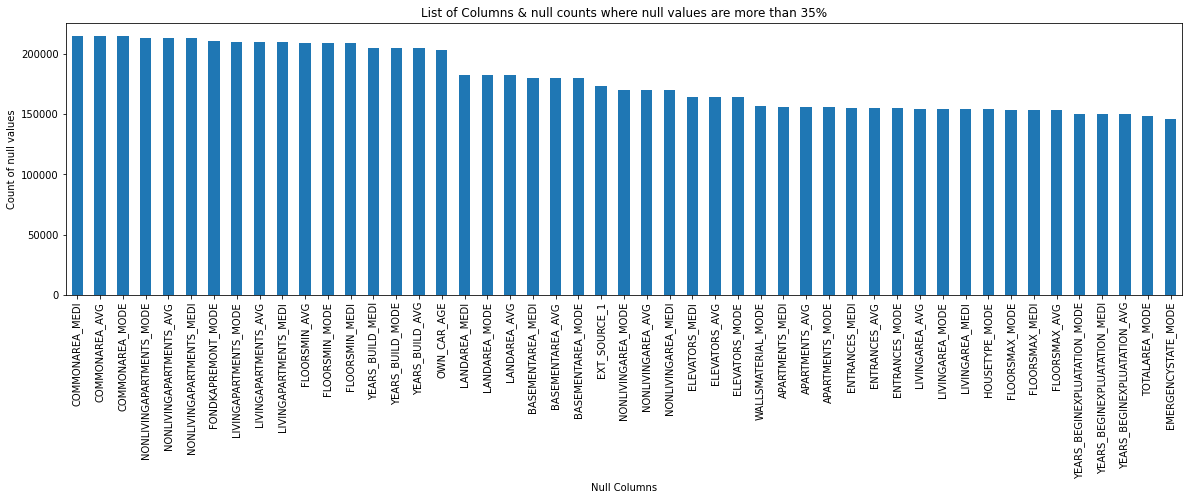

In [8]:
# taking 35% as maximum missing percentage as a threshold 
null = df.isnull().sum().sort_values(ascending=False)
null = null[null.values > (0.35*len(df))]
print(len(null))

plt.figure(figsize=(20,5))
null.plot(kind='bar')
plt.title('List of Columns & null counts where null values are more than 35%') 
plt.xlabel("Null Columns")                 
plt.ylabel("Count of null values")
plt.show()

In [9]:
label = list(null.index.values) 
df = df.drop(labels = label,axis=1)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.shape

(307511, 73)

In [11]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


In [12]:
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.median() , inplace = True)                            #EXT_SOURCE_3
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR
df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0],inplace = True)                       #NAME_TYPE_SUITE
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)    #OBS_30_CNT_SOCIAL_CIRCLE
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)    #DEF_30_CNT_SOCIAL_CIRCLE
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)    #OBS_60_CNT_SOCIAL_CIRCLE
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)    #DEF_60_CNT_SOCIAL_CIRCLE
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.median() , inplace = True)                            #EXT_SOURCE_2
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mode() , inplace = True)                        #CNT_FAM_MEMBERS
df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)         #DAYS_LAST_PHONE_CHANGE


In [13]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(10)

OCCUPATION_TYPE    31.345545
AMT_GOODS_PRICE     0.090403
AMT_ANNUITY         0.003902
CNT_FAM_MEMBERS     0.000650
FLAG_DOCUMENT_3     0.000000
FLAG_DOCUMENT_8     0.000000
FLAG_DOCUMENT_7     0.000000
FLAG_DOCUMENT_6     0.000000
FLAG_DOCUMENT_5     0.000000
FLAG_DOCUMENT_4     0.000000
dtype: float64

In [14]:
day_cols = [i for i in df if i.startswith('DAYS')]
df[day_cols]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [15]:
df[day_cols]= abs(df[day_cols])
df[day_cols]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134.0
1,16765,1188,1186.0,291,828.0
2,19046,225,4260.0,2531,815.0
3,19005,3039,9833.0,2437,617.0
4,19932,3038,4311.0,3458,1106.0
...,...,...,...,...,...
307506,9327,236,8456.0,1982,273.0
307507,20775,365243,4388.0,4090,0.0
307508,14966,7921,6737.0,5150,1909.0
307509,11961,4786,2562.0,931,322.0


In [16]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [18]:
df.loc[df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'  # imputing with mode i.e F
df['CODE_GENDER'].dropna(axis=0, inplace=True)
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
df.ORGANIZATION_TYPE.value_counts().head(20)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Name: ORGANIZATION_TYPE, dtype: int64

In [20]:
df[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

,ORGANIZATION_TYPE,NAME_INCOME_TYPE
0,Business Entity Type 3,Working
1,School,State servant
2,Government,Working
3,Business Entity Type 3,Working
4,Religion,Working
5,Other,State servant
6,Business Entity Type 3,Commercial associate
7,Other,State servant
8,XNA,Pensioner
9,Electricity,Working


#### where NAME_INCOME_TYPE is Pensioner there it has null values in ORGANIZATON_TYPE column

In [21]:
df.NAME_INCOME_TYPE.value_counts() 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

 Pensioner value is approx to null values in ORGANIZATION_TYPE 

In [22]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

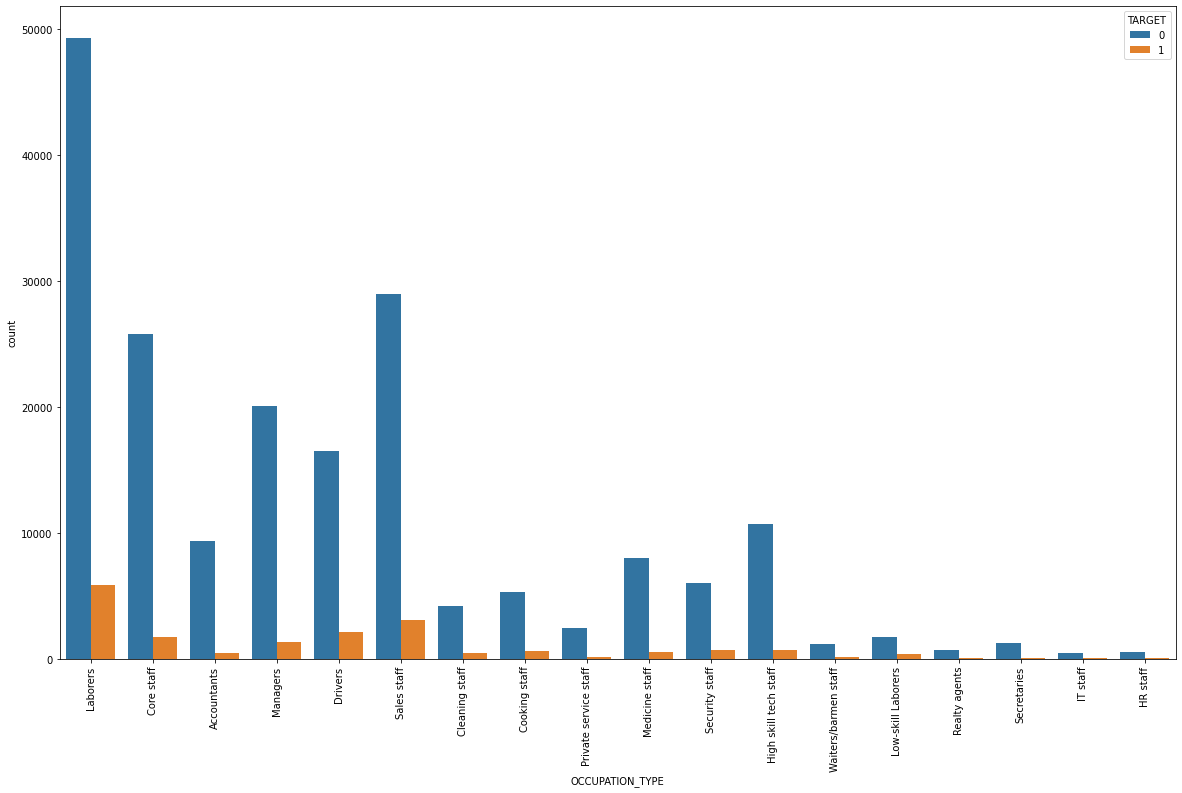

In [23]:
print(df['OCCUPATION_TYPE'].value_counts())

plt.subplots(figsize=(20, 12))
plt.xticks(rotation = 90)
sns.countplot(x='OCCUPATION_TYPE', hue= 'TARGET', data = df)

Pensioner                96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

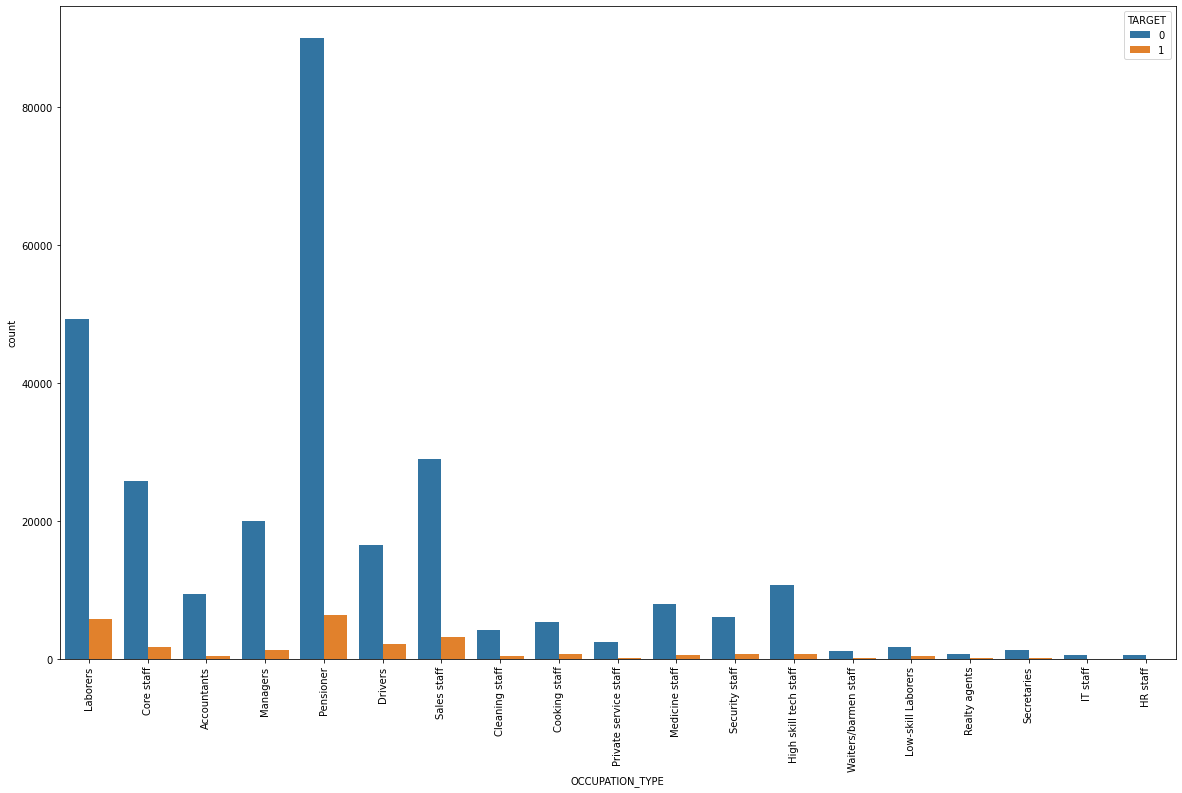

In [24]:
# similar to ORGANIZATION_TYPE, imputing null values of OCCUPATION_TYPE with Pensioner
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Pensioner')

print(df['OCCUPATION_TYPE'].value_counts())
plt.subplots(figsize=(20, 12))
plt.xticks(rotation = 90)
sns.countplot(x='OCCUPATION_TYPE', hue= 'TARGET', data = df)

In [25]:
df['DAYS_BIRTH'].head(10)

0     9461
1    16765
2    19046
3    19005
4    19932
5    16941
6    13778
7    18850
8    20099
9    14469
Name: DAYS_BIRTH, dtype: int64

In [26]:
df['DAYS_BIRTH']= (df['DAYS_BIRTH']/365).astype(int)     
df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [27]:
#binning
df['AGE_GROUP']=pd.cut(df['DAYS_BIRTH'],bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
df[['DAYS_BIRTH','AGE_GROUP']].head(10)

,DAYS_BIRTH,AGE_GROUP
0,25,Very_Young
1,45,Middle_Age
2,52,Middle_Age
3,52,Middle_Age
4,54,Middle_Age
5,46,Middle_Age
6,37,Middle_Age
7,51,Middle_Age
8,55,Middle_Age
9,39,Middle_Age


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [29]:
col = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in col:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [30]:
drop_col = ['SK_ID_CURR','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df = df.drop(drop_col,axis=1)
df.shape

(307511, 45)

In [31]:
df = df.dropna()
df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

In [32]:
Target0 = df.loc[df["TARGET"]==0] 
Target1 = df.loc[df["TARGET"]==1]

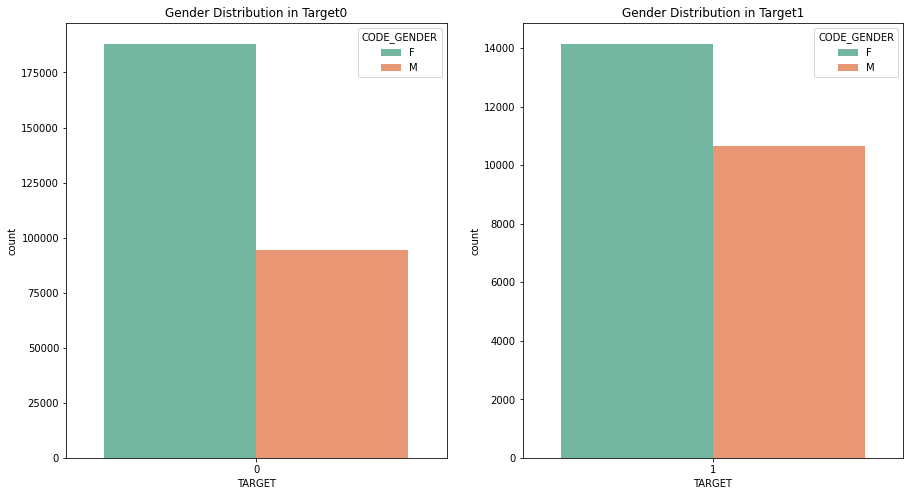

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

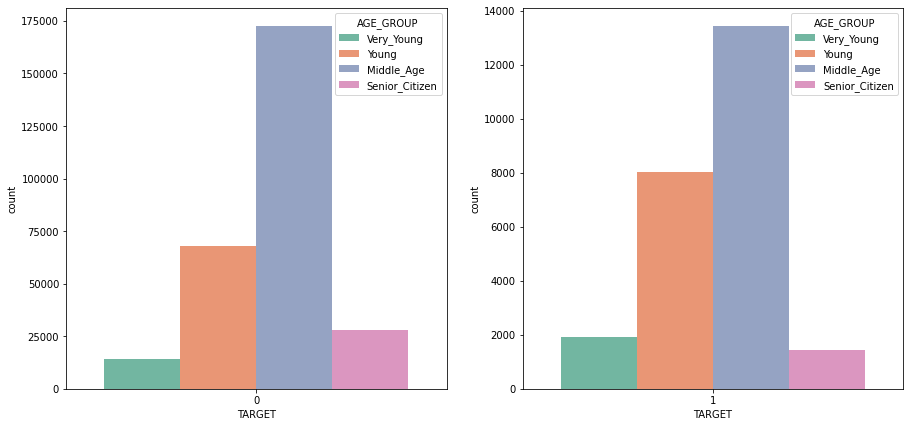

In [34]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

- It seems like Female clients applied higher than male clients for loan.
- Middle Age(35-60) the group seems to applied higher than any other age group for loans.
- Also, Middle Age group facing paying difficulties the most.
- While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.

In [35]:
categorical_col = list(df.select_dtypes(include= 'category').columns) 
print(categorical_col)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'AGE_GROUP']


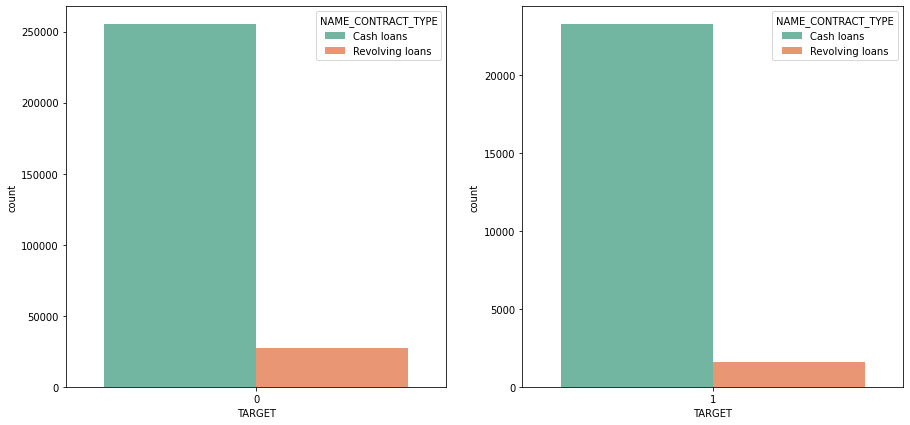

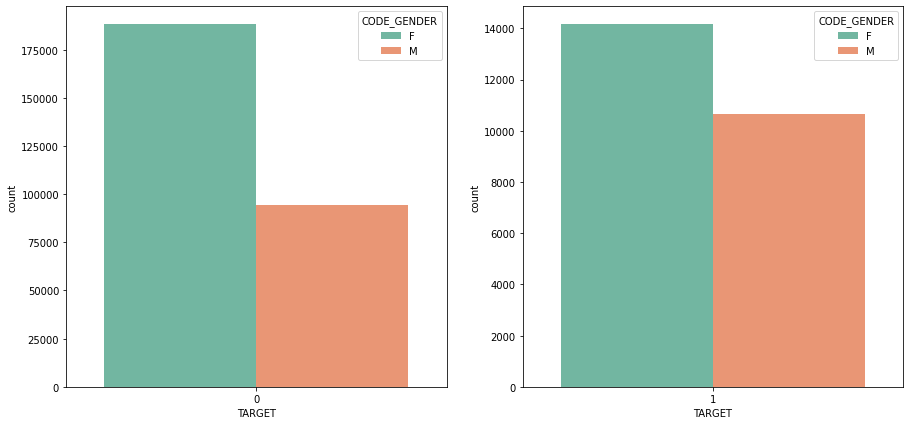

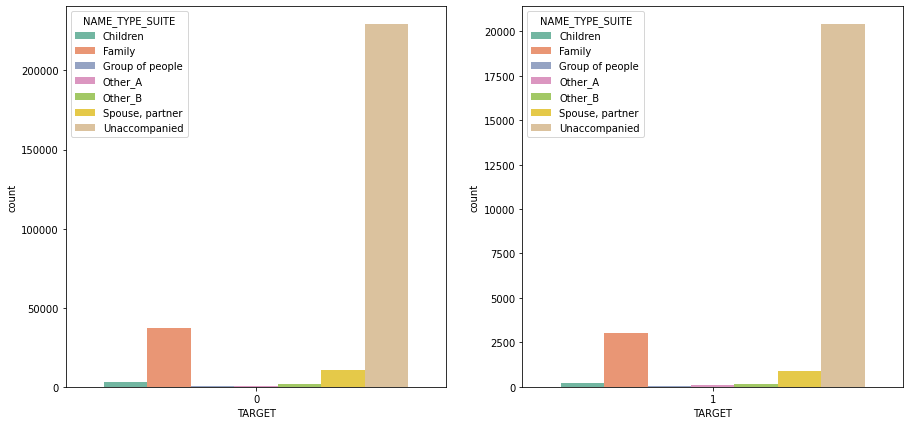

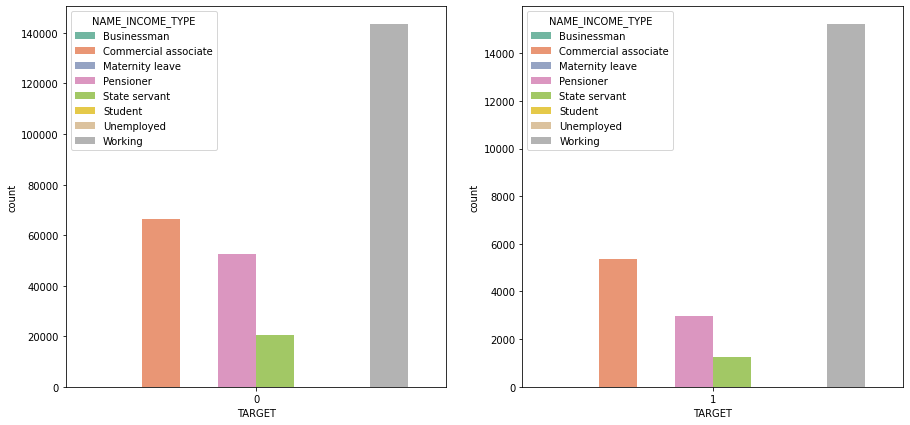

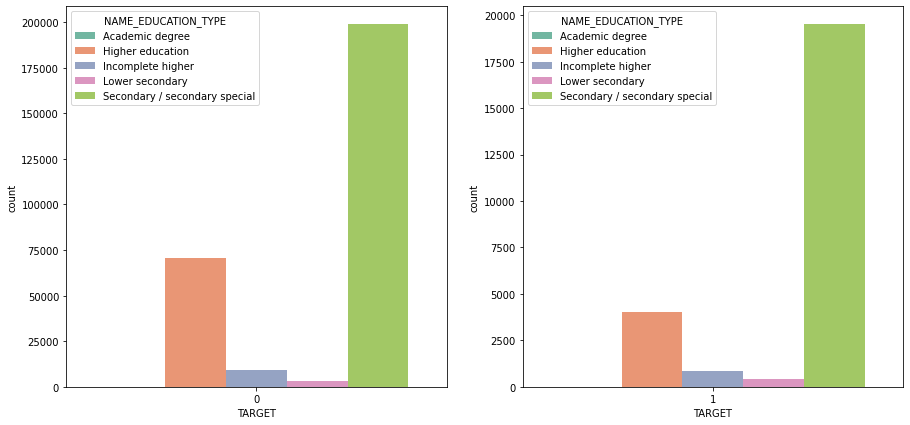

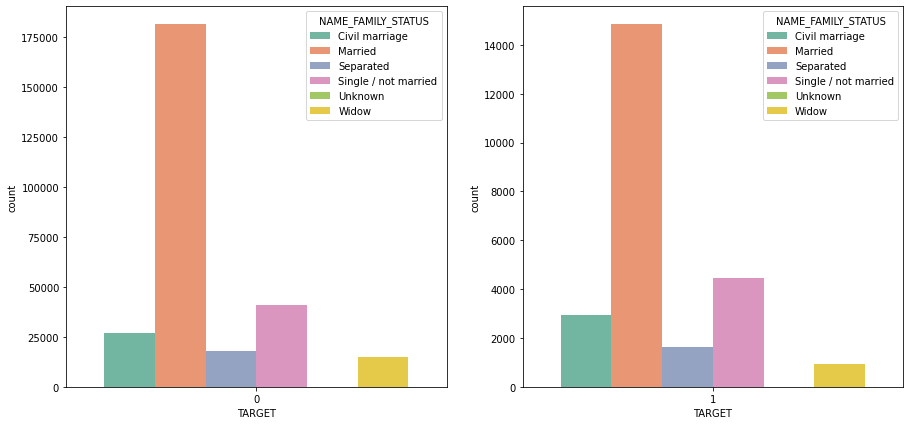

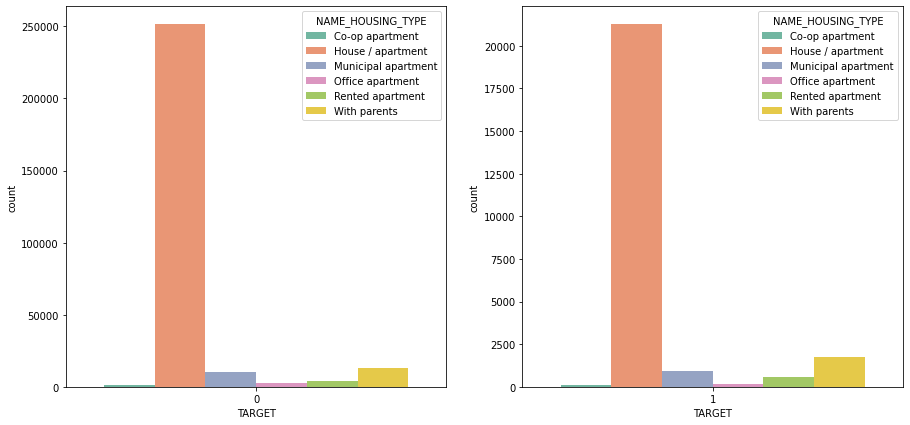

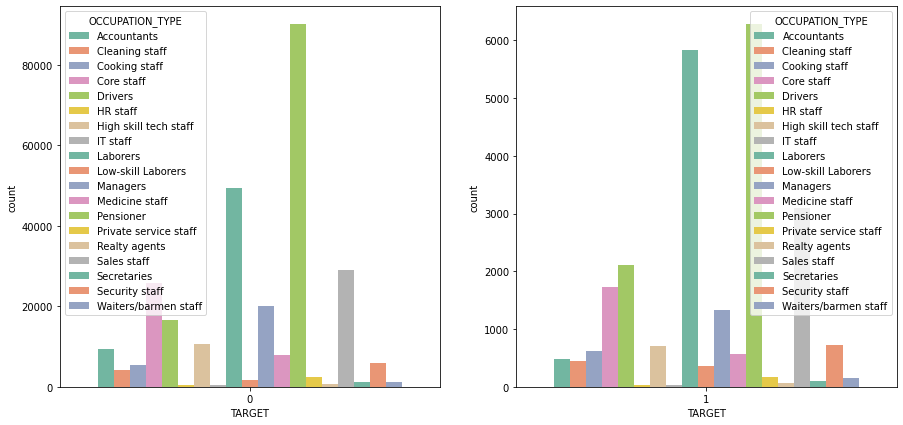

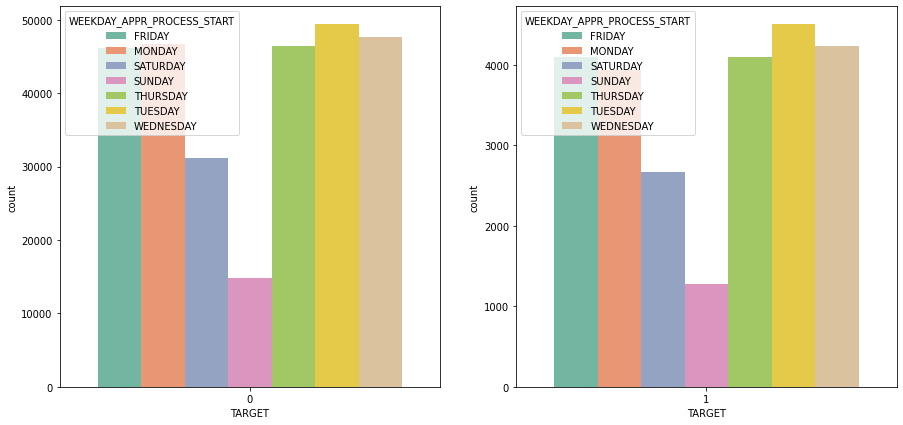

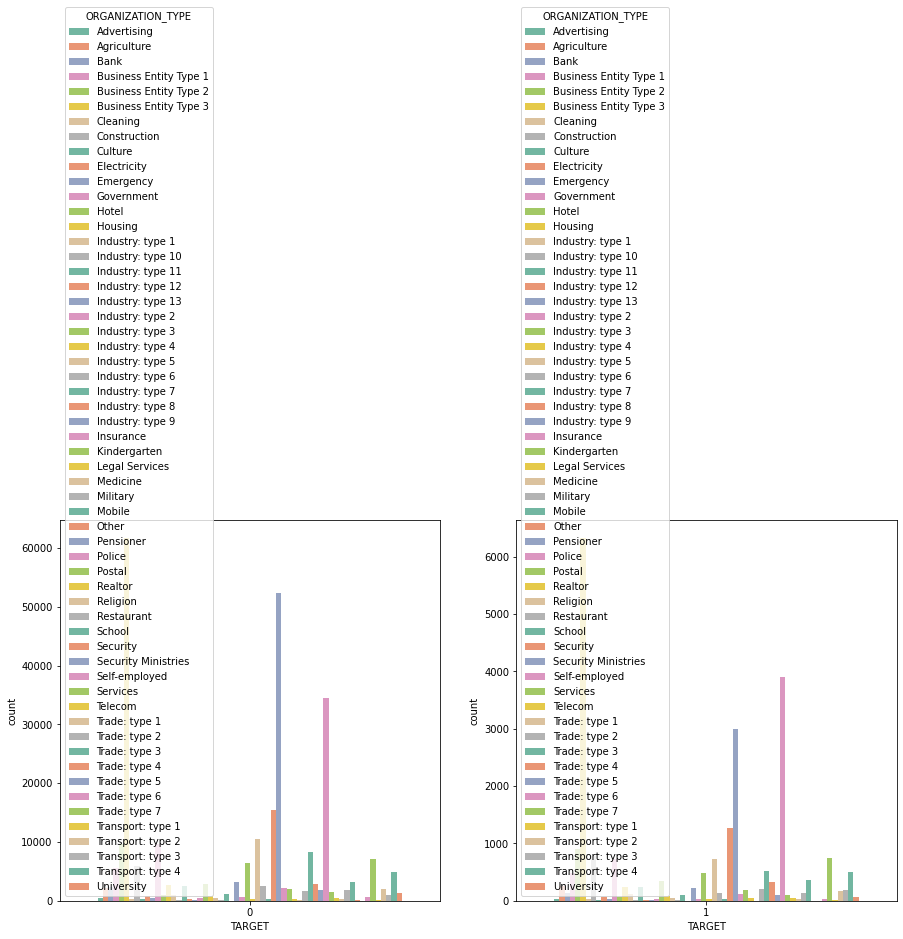

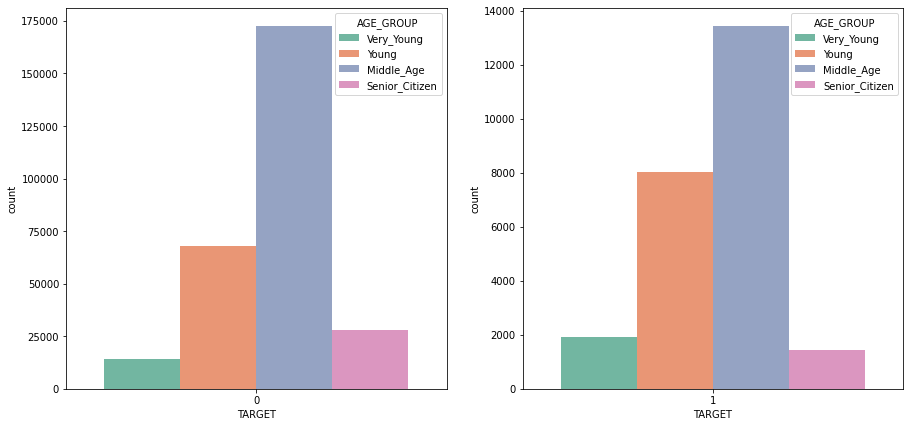

In [36]:
for col in categorical_col:
    plt.figure(figsize=(15,7)) 
    plt.subplot(121)
    sns.countplot(x='TARGET',hue=col,data=Target0,palette='Set2')
    plt.subplot(122)
    sns.countplot(x='TARGET',hue=col,data=Target1,palette='Set2')
    plt.show()

1. NAME_CONTRACT_TYPE : Most of the clients have applied for Cash Loan while very small proportion have applied for Revolving loan.
2. NAME_INCOME_TYPE : Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category. 
3. NAME_EDUCATION_TYPE : Clients having education Secondary or Secondary Special are more likey to apply for the loan.
4. NAME_FAMILY_STATUS : Married Clients seems to be applied most for the loan compared to others.
5. NAME_HOUSING_TYPE : It is clear that Most of the clients own a house or living in a apartment.
6. OCCUPATION_TYPE : Pensioners have applied the most for the loan followed by laborers.

<Axes: >

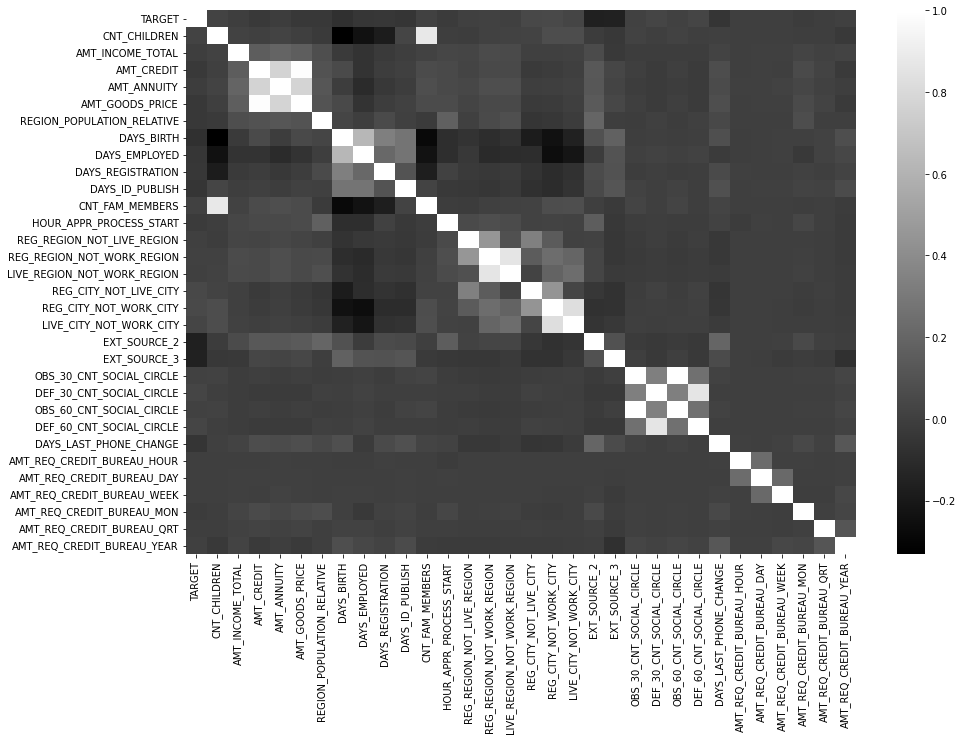

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes('number').corr(), cmap='gray')

In [38]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,Very_Young
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle_Age


In [39]:
label = LabelEncoder()

label_col = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
             'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
             'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','AGE_GROUP']

for col in label_col:
    df[col] = label.fit_transform(df[col])

df.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE               int32
CODE_GENDER                      int32
FLAG_OWN_CAR                     int32
FLAG_OWN_REALTY                  int32
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                  int32
NAME_INCOME_TYPE                 int32
NAME_EDUCATION_TYPE              int32
NAME_FAMILY_STATUS               int32
NAME_HOUSING_TYPE                int32
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int32
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                  int32
CNT_FAM_MEMBERS                float64
WEEKDAY_APPR_PROCESS_START       int32
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

In [40]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,25,637,3648.0,2120,8,1.0,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,2
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,45,1188,1186.0,291,3,2.0,1,11,0,0,0,0,0,0,40,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,52,225,4260.0,2531,8,1.0,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,52,3039,9833.0,2437,8,2.0,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,54,3038,4311.0,3458,3,1.0,4,11,0,0,0,0,1,1,38,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
x = df.drop(['TARGET'],axis = 1)
y = df['TARGET']

In [42]:
minmax = MinMaxScaler()
x = pd.DataFrame(minmax.fit_transform(x), columns=x.columns)
x.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP
0,0.0,1.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,1.000000,1.000000,1.00,0.75,0.2,0.256321,0.102041,0.001744,0.147860,0.294567,0.444444,0.000000,1.000000,0.434783,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.307542,0.155054,0.005747,0.058824,0.005814,0.083333,0.264212,0.0,0.0,0.0,0.0,0.0,0.04,0.666667
1,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,0.166667,0.571429,0.25,0.25,0.2,0.045016,0.510204,0.003253,0.048071,0.040434,0.166667,0.052632,0.166667,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,0.701754,0.727773,0.597163,0.002874,0.000000,0.002907,0.000000,0.192917,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,1.0,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,1.000000,1.000000,1.00,0.75,0.2,0.134897,0.653061,0.000616,0.172665,0.351674,0.444444,0.000000,0.166667,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.192982,0.650190,0.814130,0.000000,0.000000,0.000000,0.000000,0.189888,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
3,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,1.000000,1.000000,1.00,0.00,0.2,0.107023,0.653061,0.008320,0.398549,0.338613,0.444444,0.052632,1.000000,0.739130,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.760751,0.597163,0.005747,0.000000,0.005814,0.000000,0.143756,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
4,0.0,1.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,1.000000,1.000000,1.00,0.75,0.2,0.392880,0.693878,0.008318,0.174732,0.480478,0.166667,0.000000,0.666667,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.377472,0.597163,0.000000,0.000000,0.000000,0.000000,0.257689,0.0,0.0,0.0,0.0,0.0,0.00,0.000000


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1234, stratify=y)
x_train.shape , x_test.shape

((245776, 44), (61445, 44))

In [44]:
y_train.value_counts(), y_test.value_counts()

(0    225933
 1     19843
 Name: TARGET, dtype: int64,
 0    56484
 1     4961
 Name: TARGET, dtype: int64)

In [45]:
y_train.value_counts(normalize=True) *100 , y_test.value_counts() * 100 / y_test.count()

(0    91.926388
 1     8.073612
 Name: TARGET, dtype: float64,
 0    91.926113
 1     8.073887
 Name: TARGET, dtype: float64)

## Gaussian Naive Bayes

In [46]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)


y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,y_pred_train))
print('test accuracy is:',metrics.accuracy_score(y_test,y_pred_test))   
print()

y_pred_nb = gnb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

train accuracy is: 0.8666753466571187
test accuracy is: 0.8664333957197494

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93     56484
           1       0.17      0.17      0.17      4961

    accuracy                           0.87     61445
   macro avg       0.55      0.55      0.55     61445
weighted avg       0.87      0.87      0.87     61445



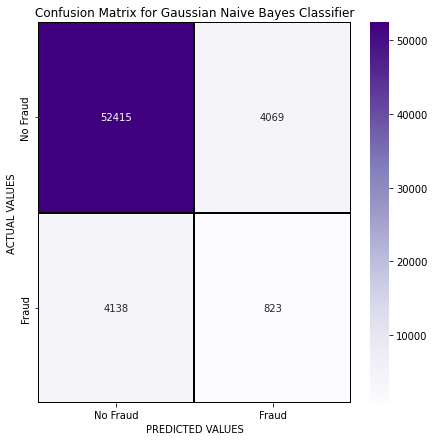

In [47]:
cm = confusion_matrix(y_test,y_pred_nb)
x_axis_labels = ["No Fraud", "Fraud"]
y_axis_labels = ["No Fraud", "Fraud"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

## Multinomial Naive Bayes

In [48]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)


mnb_pred_train = mnb.predict(x_train)
mnb_pred_test = mnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,mnb_pred_train))
print('test accuracy is:',metrics.accuracy_score(y_test,mnb_pred_test))     
print()

y_pred_mnb = mnb.predict(x_test)
print("Naive Bayes Classifier report:TEST \n\n", classification_report(y_test, y_pred_mnb))

train accuracy is: 0.9192638825597292
test accuracy is: 0.9192611278379038

Naive Bayes Classifier report:TEST 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56484
           1       0.00      0.00      0.00      4961

    accuracy                           0.92     61445
   macro avg       0.46      0.50      0.48     61445
weighted avg       0.85      0.92      0.88     61445



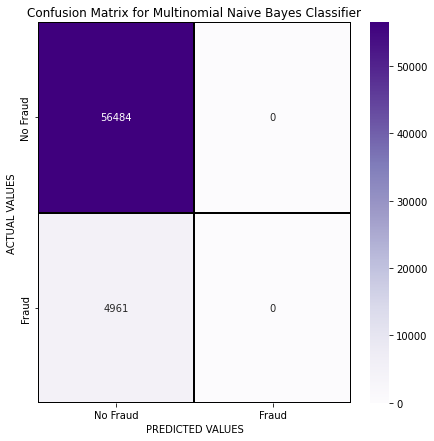

In [49]:
cm = confusion_matrix(y_test,y_pred_mnb)
x_axis_labels = ["No Fraud", "Fraud"]
y_axis_labels = ["No Fraud", "Fraud"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Multinomial Naive Bayes Classifier')
plt.show()

## Bernoulli Naive Bayes

In [50]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)


bnb_pred_train = bnb.predict(x_train)
bnb_pred_test = bnb.predict(x_test)

print('train accuracy is:',metrics.accuracy_score(y_train,bnb_pred_train))
print('test accuracy is:',metrics.accuracy_score(y_test,bnb_pred_test))     

print()

y_pred_bnb = bnb.predict(x_test)
print("Naive Bayes Classifier report:TEST \n\n", classification_report(y_test, y_pred_bnb))

train accuracy is: 0.919186576394766
test accuracy is: 0.9192123036862234

Naive Bayes Classifier report:TEST 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56484
           1       0.29      0.00      0.00      4961

    accuracy                           0.92     61445
   macro avg       0.60      0.50      0.48     61445
weighted avg       0.87      0.92      0.88     61445



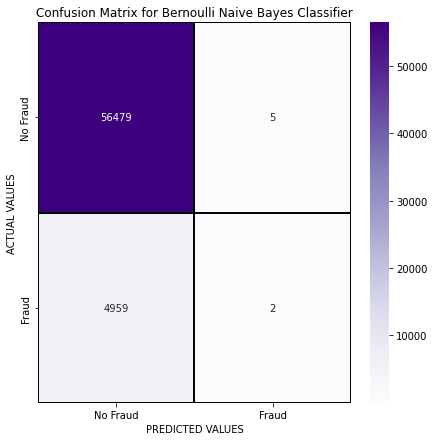

In [51]:
cm = confusion_matrix(y_test,y_pred_bnb)
x_axis_labels = ["No Fraud", "Fraud"]
y_axis_labels = ["No Fraud", "Fraud"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()

## Logistic Regression

In [52]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(lr.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))
print()

y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Train Accuracy: 91.91%
Test Accuracy: 91.93%

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56484
           1       0.52      0.01      0.01      4961

    accuracy                           0.92     61445
   macro avg       0.72      0.50      0.49     61445
weighted avg       0.89      0.92      0.88     61445



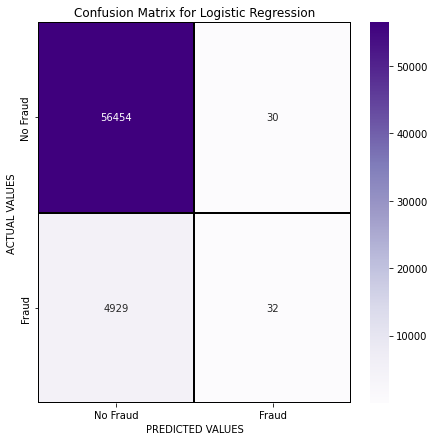

In [53]:
cm = confusion_matrix(y_test,y_pred_lr)
x_axis_labels = ["No Fraud", "Fraud"]
y_axis_labels = ["No Fraud", "Fraud"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Decision Tree Classifier

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(dt.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))
print()

y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Train Accuracy: 100.0%
Test Accuracy: 85.12%

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92     56484
           1       0.14      0.16      0.15      4961

    accuracy                           0.85     61445
   macro avg       0.53      0.54      0.53     61445
weighted avg       0.86      0.85      0.86     61445



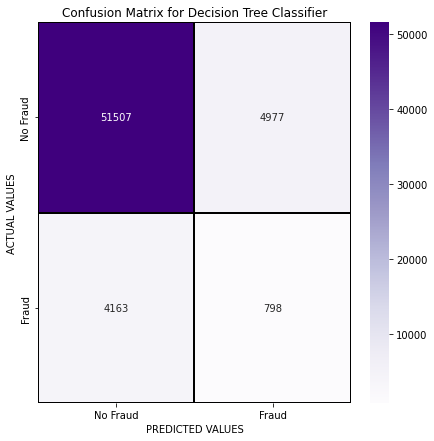

In [55]:
cm = confusion_matrix(y_test,y_pred_dt)
x_axis_labels = ["No Fraud", "Fraud"]
y_axis_labels = ["No Fraud", "Fraud"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest Classifier

In [56]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(rfc.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(rfc.score(x_test, y_test)*100,2)))
print()

y_pred_rfc = rfc.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rfc))

Train Accuracy: 100.0%
Test Accuracy: 91.94%

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56484
           1       0.67      0.00      0.01      4961

    accuracy                           0.92     61445
   macro avg       0.79      0.50      0.48     61445
weighted avg       0.90      0.92      0.88     61445



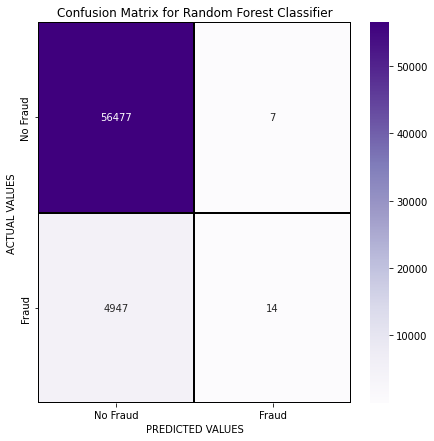

In [57]:
cm = confusion_matrix(y_test,y_pred_rfc)
x_axis_labels = ["No Fraud", "Fraud"]
y_axis_labels = ["No Fraud", "Fraud"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## AUC-ROC curve

In [58]:

fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

fpr_mnb, tpr_mnb, threshold_mnb = roc_curve(y_test, y_pred_mnb)
roc_auc_mnb = auc(fpr_mnb,tpr_mnb)

fpr_bnb, tpr_bnb, threshold_bnb = roc_curve(y_test, y_pred_bnb)
roc_auc_bnb = auc(fpr_bnb,tpr_bnb)

fpr_l, tpr_l, threshold_l = roc_curve(y_test, y_pred_lr)
roc_auc_l = auc(fpr_l,tpr_l)

fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, y_pred_rfc)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)

<IPython.core.display.Javascript object>


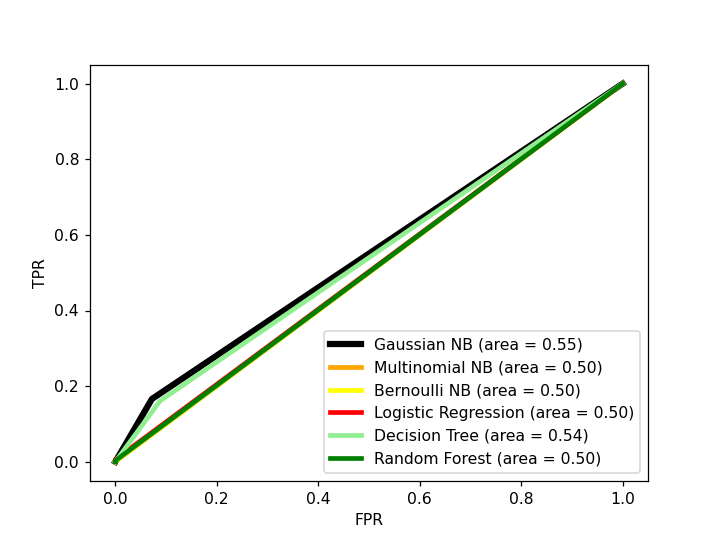

In [59]:
%matplotlib notebook

plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
plt.plot(fpr_nb, tpr_nb, color='black', lw=4, label='Gaussian NB (area = %0.2f)'%roc_auc_nb)         # gaussian nb
plt.plot(fpr_mnb, tpr_mnb, color='orange', lw=3, label='Multinomial NB (area = %0.2f)'%roc_auc_mnb)  # multinomial nb
plt.plot(fpr_bnb, tpr_bnb, color='yellow', lw=3, label='Bernoulli NB (area = %0.2f)'%roc_auc_bnb)    # bernoulli nb
plt.plot(fpr_l, tpr_l, color='red', lw=3, label='Logistic Regression (area = %0.2f)'%roc_auc_l)      # logistic regression
plt.plot(fpr_dt, tpr_dt, color='lightgreen', lw=3, label='Decision Tree (area = %0.2f)'%roc_auc_dt)  # Decision Tree
plt.plot(fpr_rfc, tpr_rfc, color='green', lw=3, label='Random Forest (area = %0.2f)'%roc_auc_rfc)    # Random Forest

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')

Accuracy
- **Gaussian Naive Bayes**      :      86.64 %
- **Multinomial Naive Bayes**   :      91.92 %
- **Bernoulli Naive Bayes**     :      91.92 %
- **Logistic Regression**       :      91.93 %
- **Decision Tree Classifier**  :      85.24 %
- **Random Forest Classifier**  :      91.95 %

From the above confusion matrices it is clear that precision is important i.e. we need to reduce False-Positive value.
Why precision? Because Even though it says the customer is fraud, it is predicting it as not fraud, this is not good 
for business.


Precision
- **Gaussian Naive Bayes**      :      0.17
- **Multinomial Naive Bayes**   :      0.00
- **Bernoulli Naive Bayes**     :      0.29
- **Logistic Regression**       :      0.52
- **Decision Tree Classifier**  :      0.14
- **Random Forest Classifier**  :      0.67

Although according to **AUC-ROC** curve *Gaussian Naive Bayes* is a better classifier but by
checking **accuracy and precision**, *Random Forest classifier* as better accuracy and precision than other models

### Therefore, Random Forest is the better classifier for this problem with 91.95% accuracy and 67% precision